In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
# import seaborn as sns

In [2]:
data = pd.read_csv('./CleanedDataset.csv')

In [3]:
data.head()

,last_updated,tweet_id,created_at,full_text,processed_tweet,Party,quote_count,reply_count,retweet_count,Importance,...,Neutral,Positive,Negative,Compound,hashtags,user_mentions_screen_name,City,State,Country,Score
0,2019-02-08 17:29:00,1.090000e+18,2019-02-08 17:28:00,@DasComrade Sir any comment on modi's grand en...,dascomrad sir comment modi grand entri,BJP,0.0,0.0,1.0,0,...,0.625,0.375,0.000,0.4588,NaN,DasComrade,Guwahati,Assam,India,0.045645
1,2019-02-08 17:29:00,1.090000e+18,2019-02-07 05:10:00,Congress made Vemula national talking point ev...,congress made vemula nation talk point even th...,BJP,47.0,72.0,2353.0,1,...,0.868,0.000,0.132,-0.5719,NaN,NaN,Mumbai,Maharashtra,India,108.990410
2,2019-02-08 17:30:00,1.090000e+18,2019-02-08 10:18:00,BJP has been winning battles over the past mon...,bjp win battl past month bengal pm modi arriv ...,BJP,1.0,12.0,513.0,1,...,0.582,0.276,0.142,0.5719,NaN,NaN,Kolkata,West Bengal,India,24.487725
3,2019-02-08 17:30:00,1.090000e+18,2019-02-08 17:29:00,@inclusivemind2 @Ark82876233 @BJP4India @Rahul...,inclusivemind ark bjpindia rahul gandhi bjp th...,Other,0.0,0.0,2.0,0,...,0.884,0.116,0.000,0.4404,NaN,"inclusivemind2,Ark82876233,BJP4India,RahulGandhi",Aligarh,Uttar Pradesh,India,0.091290
4,2019-02-08 17:30:00,1.090000e+18,2019-02-08 14:19:00,Senior Congress leader @ManishTewari : There w...,senior congress leader manishtewari jpc defini...,Congress,0.0,1.0,159.0,1,...,1.000,0.000,0.000,0.0000,NaN,ManishTewari,New Delhi,Delhi,India,8.263217


In [4]:
data.columns

Index(['last_updated', 'tweet_id', 'created_at', 'full_text',
       'processed_tweet', 'Party', 'quote_count', 'reply_count',
       'retweet_count', 'Importance', 'favorite_count', 'Neutral', 'Positive',
       'Negative', 'Compound', 'hashtags', 'user_mentions_screen_name', 'City',
       'State', 'Country', 'Score'],
      dtype='object')

In [5]:
data.isnull().sum()

last_updated                     0
tweet_id                         0
created_at                       0
full_text                        0
processed_tweet                  0
Party                            0
quote_count                      0
reply_count                      0
retweet_count                    0
Importance                       0
favorite_count                   0
Neutral                          0
Positive                         0
Negative                         0
Compound                         0
hashtags                     31740
user_mentions_screen_name    25080
City                         24124
State                        24124
Country                          0
Score                            0
dtype: int64

In [6]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39874 entries, 0 to 39873
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   last_updated               39874 non-null  object 
 1   tweet_id                   39874 non-null  float64
 2   created_at                 39874 non-null  object 
 3   full_text                  39874 non-null  object 
 4   processed_tweet            39874 non-null  object 
 5   Party                      39874 non-null  object 
 6   quote_count                39874 non-null  float64
 7   reply_count                39874 non-null  float64
 8   retweet_count              39874 non-null  float64
 9   Importance                 39874 non-null  int64  
 10  favorite_count             39874 non-null  int64  
 11  Neutral                    39874 non-null  float64
 12  Positive                   39874 non-null  float64
 13  Negative                   39874 non-null  flo

In [10]:
data['quote_count'] # THE NUMBER OF TIMES THE TWEET HAVE BEEN RE-TWEETED WITH A NEW COMMENT

0          0.0
1         47.0
2          1.0
3          0.0
4          0.0
         ...  
39869      0.0
39870    156.0
39871      0.0
39872      7.0
39873     50.0
Name: quote_count, Length: 39874, dtype: float64

In [11]:
data['favorite_count'] # 

0            1
1         2353
2          513
3            2
4          159
         ...  
39869       18
39870    16017
39871       99
39872      463
39873      340
Name: favorite_count, Length: 39874, dtype: int64

In [14]:
data['user_mentions_screen_name'] #SCREEN NAME MEANS USER NAME

0                                              DasComrade
1                                                     NaN
2                                                     NaN
3        inclusivemind2,Ark82876233,BJP4India,RahulGandhi
4                                            ManishTewari
                               ...                       
39869                                                 NaN
39870                                                 NaN
39871                                                 NaN
39872                                            PMOIndia
39873                                          IndiaToday
Name: user_mentions_screen_name, Length: 39874, dtype: object

In [19]:
len(data['City'].unique())

603

In [21]:
len(data['State'].unique())
data['State'].unique()

array(['Assam', 'Maharashtra', 'West Bengal', 'Uttar Pradesh', 'Delhi',
       nan, 'Gujarat', 'Tamil Nadu', 'Jharkhand', 'Kerala', 'Karnataka',
       'Madhya Pradesh', 'Haryana', 'Chhattisgarh', 'Telangana', 'Punjab',
       'Andhra Pradesh', 'Rajasthan', 'Jammu & Kashmir', 'Chandigarh',
       'Daman & Diu', 'Goa', 'Uttaranchal', 'Pondicherry',
       'Arunachal Pradesh', 'Nagaland', 'Andaman & Nicobar Islands',
       'Bihar', 'Orissa', 'Mizoram', 'Manipur', 'Himachal Pradesh',
       'Sikkim', 'Tripura', 'Meghalaya', 'Lakshadweep'], dtype=object)

In [23]:
data['Country'].unique()  # Not needed 

array(['India'], dtype=object)

In [24]:
data['Score']

0          0.045645
1        108.990410
2         24.487725
3          0.091290
4          8.263217
            ...    
39869      0.827280
39870    734.494352
39871      5.518849
39872     22.330475
39873     17.799096
Name: Score, Length: 39874, dtype: float64

In [36]:
string=data['full_text'][14]

In [37]:
string

'Rahul Gandhi ji, you used to claim that defence minister @manoharparrikar ji was completely ignored during #RafaleDeal then what is his noting doing on Rafale file? Another Lie Exposed!!!\n#RahulLieCaught https://t.co/AhXoX1r3jt'

In [8]:
data.iloc[:,11:15]

,Neutral,Positive,Negative,Compound
0,0.625,0.375,0.000,0.4588
1,0.868,0.000,0.132,-0.5719
2,0.582,0.276,0.142,0.5719
3,0.884,0.116,0.000,0.4404
4,1.000,0.000,0.000,0.0000
...,...,...,...,...
39869,0.751,0.083,0.165,-0.3887
39870,0.675,0.000,0.325,-0.8779
39871,0.625,0.375,0.000,0.1027
39872,0.500,0.345,0.155,0.5859


In [12]:
data['full_text'][39869]

"A web page dedicated to tracking Rahul Gandhi's numerous lies. Because there are so many. Because we should never forget that Rahul Gandhi is a big fat liar. \nhttps://t.co/5or6zmAZb6 https://t.co/Xy1JECP9Fw"

* So we will consider full texts only because then the processed ones are lossing their meaning
* also compound score is important, so let's take analyse it first


In [23]:
ana1 = {'text':data['full_text'],'score':data['Compound']}

In [24]:
ana1 = pd.DataFrame(ana1)

In [25]:
ana1.head()

,text,score
0,@DasComrade Sir any comment on modi's grand en...,0.4588
1,Congress made Vemula national talking point ev...,-0.5719
2,BJP has been winning battles over the past mon...,0.5719
3,@inclusivemind2 @Ark82876233 @BJP4India @Rahul...,0.4404
4,Senior Congress leader @ManishTewari : There w...,0.0000


In [26]:
ana1.to_csv('./text-score.csv')

**Clearly all the data in `text-score.csv` file is suggesting that score is negative means hate possibility is high**
* As a next step we will filter negative score compound `full_texts` from this dataset

In [37]:
hate1 = data[data['Compound']<=0]

In [41]:
x=len(hate1)
x

24430

In [42]:
y=len(data)
y

39874

In [43]:
y-x

15444

* 15444 records have been removed

In [44]:
hate1.head()

,last_updated,tweet_id,created_at,full_text,processed_tweet,Party,quote_count,reply_count,retweet_count,Importance,...,Neutral,Positive,Negative,Compound,hashtags,user_mentions_screen_name,City,State,Country,Score
1,2019-02-08 17:29:00,1.090000e+18,2019-02-07 05:10:00,Congress made Vemula national talking point ev...,congress made vemula nation talk point even th...,BJP,47.0,72.0,2353.0,1,...,0.868,0.0,0.132,-0.5719,NaN,NaN,Mumbai,Maharashtra,India,108.990410
4,2019-02-08 17:30:00,1.090000e+18,2019-02-08 14:19:00,Senior Congress leader @ManishTewari : There w...,senior congress leader manishtewari jpc defini...,Congress,0.0,1.0,159.0,1,...,1.000,0.0,0.000,0.0000,NaN,ManishTewari,New Delhi,Delhi,India,8.263217
5,2019-02-08 17:30:00,1.090000e+18,2019-02-08 15:13:00,Is it b/c there are those in congress taking k...,bc congress take kickback fr pp,Congress,0.0,2.0,34.0,0,...,1.000,0.0,0.000,0.0000,NaN,NaN,NaN,NaN,India,1.563270
6,2019-02-08 17:30:00,1.090000e+18,2019-02-08 09:16:00,#RahulLieCaught | EXCLUSIVE: Former Defence Se...,rahulliecaught exclus former defenc secretari ...,Congress,22.0,34.0,680.0,1,...,0.879,0.0,0.121,-0.2960,RahulLieCaught,NaN,Mumbai,Maharashtra,India,32.315419
7,2019-02-08 17:30:00,1.090000e+18,2019-02-07 13:44:00,Expect a meltdown in Congress before election....,expect meltdown congress elect wait till febru...,Congress,1.0,11.0,203.0,1,...,1.000,0.0,0.000,0.0000,NaN,NaN,NaN,NaN,India,10.332122


* Now let's remove all the columns that would not be needed

In [45]:
hate1.columns

Index(['last_updated', 'tweet_id', 'created_at', 'full_text',
       'processed_tweet', 'Party', 'quote_count', 'reply_count',
       'retweet_count', 'Importance', 'favorite_count', 'Neutral', 'Positive',
       'Negative', 'Compound', 'hashtags', 'user_mentions_screen_name', 'City',
       'State', 'Country', 'Score'],
      dtype='object')

In [48]:
hate1.drop(['tweet_id','processed_tweet','Neutral','Positive','Negative','City'],axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_16376\3462354977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate1.drop(['tweet_id','processed_tweet','Neutral','Positive','Negative','City'],axis=1,inplace=True)


In [73]:
hate1.shape

(24430, 15)

In [74]:
hate1.columns

Index(['last_updated', 'created_at', 'full_text', 'Party', 'quote_count',
       'reply_count', 'retweet_count', 'Importance', 'favorite_count',
       'Compound', 'hashtags', 'user_mentions_screen_name', 'State', 'Country',
       'Score'],
      dtype='object')

In [75]:
hate1.head()

,last_updated,created_at,full_text,Party,quote_count,reply_count,retweet_count,Importance,favorite_count,Compound,hashtags,user_mentions_screen_name,State,Country,Score
1,2019-02-08 17:29:00,2019-02-07 05:10:00,Congress made Vemula national talking point ev...,BJP,47.0,72.0,2353.0,1,2353,-0.5719,NaN,NaN,Maharashtra,India,108.990410
4,2019-02-08 17:30:00,2019-02-08 14:19:00,Senior Congress leader @ManishTewari : There w...,Congress,0.0,1.0,159.0,1,159,0.0000,NaN,ManishTewari,Delhi,India,8.263217
5,2019-02-08 17:30:00,2019-02-08 15:13:00,Is it b/c there are those in congress taking k...,Congress,0.0,2.0,34.0,0,34,0.0000,NaN,NaN,NaN,India,1.563270
6,2019-02-08 17:30:00,2019-02-08 09:16:00,#RahulLieCaught | EXCLUSIVE: Former Defence Se...,Congress,22.0,34.0,680.0,1,680,-0.2960,RahulLieCaught,NaN,Maharashtra,India,32.315419
7,2019-02-08 17:30:00,2019-02-07 13:44:00,Expect a meltdown in Congress before election....,Congress,1.0,11.0,203.0,1,203,0.0000,NaN,NaN,NaN,India,10.332122


In [108]:
hate1.fillna(0,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_16376\377262796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate1.fillna(0,inplace=True)


In [115]:
hate1.head()

,last_updated,created_at,full_text,Party,quote_count,reply_count,retweet_count,Importance,favorite_count,Compound,hashtags,user_mentions_screen_name,State,Country,Score
1,2019-02-08 17:29:00,2019-02-07 05:10:00,Congress made Vemula national talking point ev...,BJP,47.0,72.0,2353.0,1,2353,-0.5719,0,0,Maharashtra,India,108.990410
4,2019-02-08 17:30:00,2019-02-08 14:19:00,Senior Congress leader @ManishTewari : There w...,Congress,0.0,1.0,159.0,1,159,0.0000,0,ManishTewari,Delhi,India,8.263217
5,2019-02-08 17:30:00,2019-02-08 15:13:00,Is it b/c there are those in congress taking k...,Congress,0.0,2.0,34.0,0,34,0.0000,0,0,0,India,1.563270
6,2019-02-08 17:30:00,2019-02-08 09:16:00,#RahulLieCaught | EXCLUSIVE: Former Defence Se...,Congress,22.0,34.0,680.0,1,680,-0.2960,RahulLieCaught,0,Maharashtra,India,32.315419
7,2019-02-08 17:30:00,2019-02-07 13:44:00,Expect a meltdown in Congress before election....,Congress,1.0,11.0,203.0,1,203,0.0000,0,0,0,India,10.332122


In [109]:
hashtags=hate1[hate1['hashtags']!=0]

In [114]:
hashtags.shape

(5049, 15)

In [168]:
party=pd.DataFrame(hate1['Party'].value_counts())
party

,count
Party,
BJP,13509
Congress,8732
Other,2189


In [159]:
y=np.array(party['count'])
x=['BJP','Congress','Other']

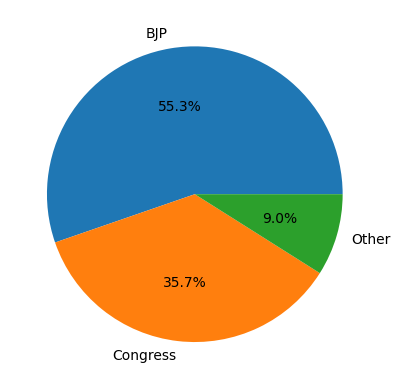

In [165]:
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

* only negative count

In [170]:
negative = hate1[hate1['Compound']<0]
negative

,last_updated,created_at,full_text,Party,quote_count,reply_count,retweet_count,Importance,favorite_count,Compound,hashtags,user_mentions_screen_name,State,Country,Score
1,2019-02-08 17:29:00,2019-02-07 05:10:00,Congress made Vemula national talking point ev...,BJP,47.0,72.0,2353.0,1,2353,-0.5719,0,0,Maharashtra,India,108.990410
6,2019-02-08 17:30:00,2019-02-08 09:16:00,#RahulLieCaught | EXCLUSIVE: Former Defence Se...,Congress,22.0,34.0,680.0,1,680,-0.2960,RahulLieCaught,0,Maharashtra,India,32.315419
8,2019-02-08 17:30:00,2019-02-08 16:30:00,These stories really exposes our development p...,BJP,1.0,0.0,10.0,0,10,-0.2500,0,0,0,India,0.460270
9,2019-02-08 17:30:00,2019-02-08 08:57:00,"If there is no issue or problem, why is Parrik...",BJP,3.0,3.0,123.0,1,123,-0.4019,0,0,Delhi,India,6.642802
17,2019-02-08 17:30:00,2019-02-07 16:14:00,Prime Minister Shri @narendramodi today expose...,BJP,52.0,295.0,10761.0,1,10761,-0.4767,0,narendramodi,0,India,494.056771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39862,2019-05-16 18:28:00,2019-05-16 15:27:00,.@fayedsouza to BJP's @ShainaNC: You've refuse...,BJP,1.0,3.0,18.0,0,18,-0.7184,0,"fayedsouza,ShainaNC",0,India,0.842442
39865,2019-05-16 18:28:00,2019-05-16 11:48:00,@chitrapadhi Paper thin skin of BJP leaders......,BJP,0.0,0.0,3.0,0,3,-0.5653,0,chitrapadhi,Delhi,India,0.136935
39868,2019-05-16 18:28:00,2019-05-16 11:43:00,This is way way way more important than what h...,Congress,0.0,0.0,10.0,0,10,-0.8271,0,0,0,India,0.456449
39869,2019-05-16 18:29:00,2019-05-16 14:55:00,A web page dedicated to tracking Rahul Gandhi'...,Congress,0.0,1.0,18.0,0,18,-0.3887,0,0,0,India,0.827280


In [171]:
negative_sentences = negative['full_text']

In [181]:
negative_sentences=pd.DataFrame(negative_sentences)
negative_sentences

,0
0,Congress made Vemula national talking point ev...
1,#RahulLieCaught | EXCLUSIVE: Former Defence Se...
2,These stories really exposes our development p...
3,"If there is no issue or problem, why is Parrik..."
4,Prime Minister Shri @narendramodi today expose...
...,...
14114,.@fayedsouza to BJP's @ShainaNC: You've refuse...
14115,@chitrapadhi Paper thin skin of BJP leaders......
14116,This is way way way more important than what h...
14117,A web page dedicated to tracking Rahul Gandhi'...


In [182]:
len(negative_sentences)

14119

In [183]:
negative_sentences.to_csv('./hate_sentences.csv')